# Polynomial Rregession 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use("dark_background")

## Read Data

In [2]:
df = pd.read_csv("./../../datasets/real_estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Data Visualization

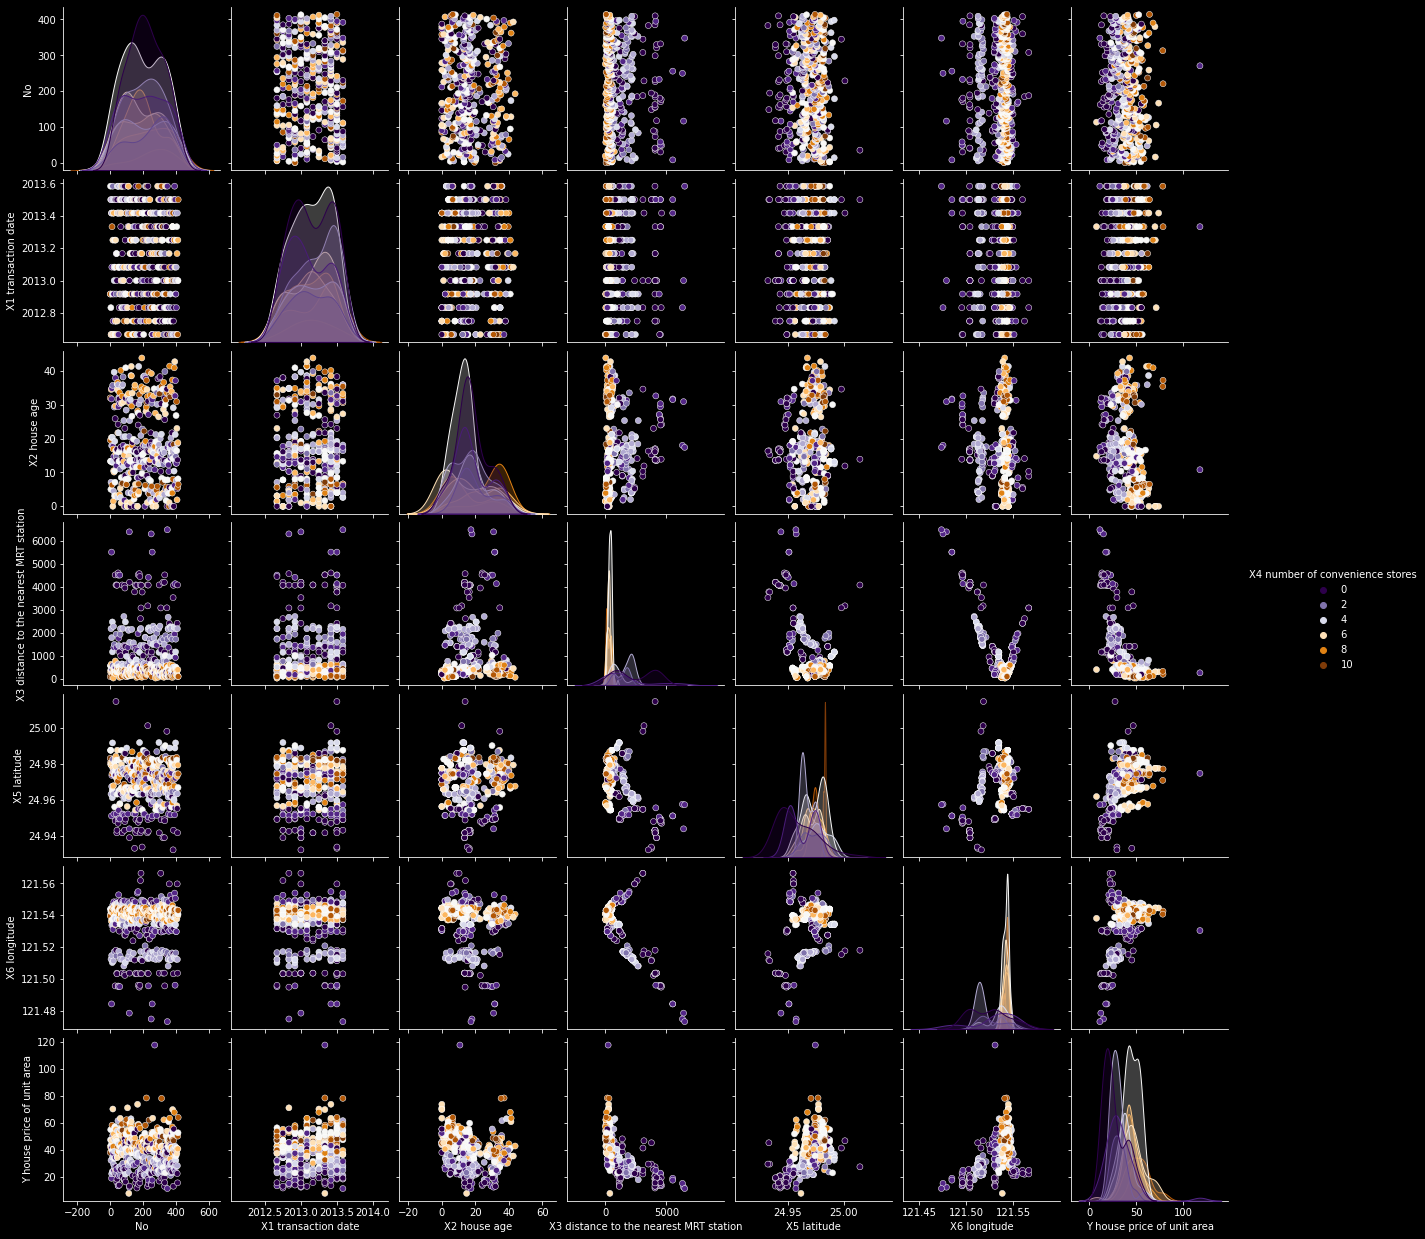

In [3]:
sns.pairplot(data=df, hue='X4 number of convenience stores', palette="PuOr_r")
plt.show()

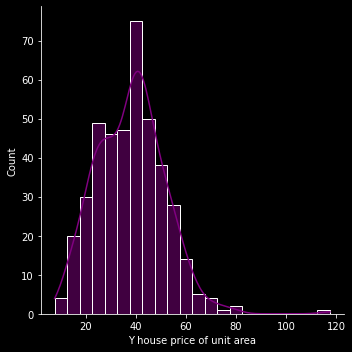

In [56]:
sns.displot(data=df, x='Y house price of unit area', kde=True , color='purple')
plt.show()

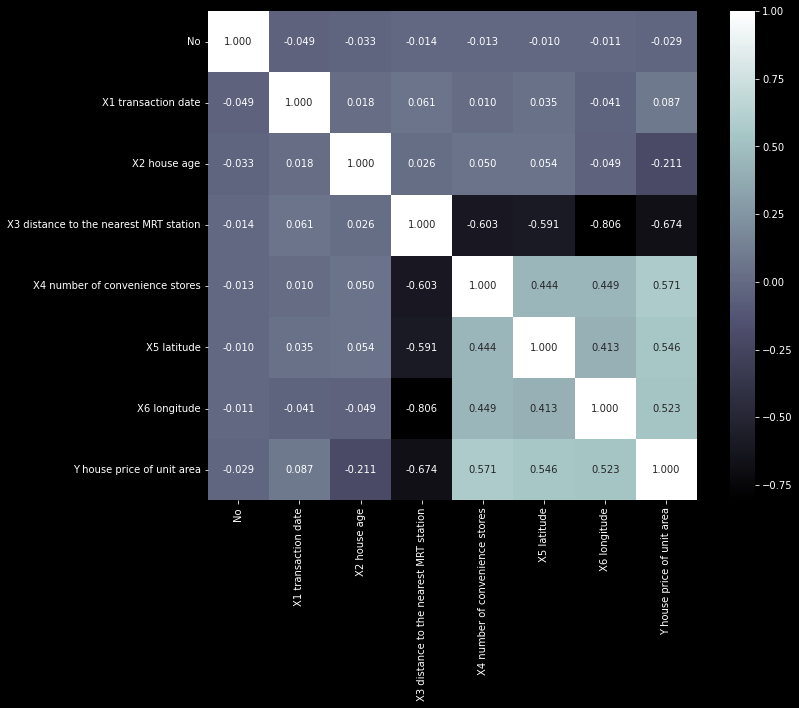

In [4]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot = True, cmap=plt.cm.bone, fmt='.3f', square=True)
plt.show()

## Determine the Features & Target Variable

In [24]:
X = df.iloc[:, 1:7]
y = df["Y house price of unit area"]

## Preprocessing

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_fea = PolynomialFeatures(degree=2)

X_polyR = poly_fea.fit_transform(X)

<br><br><br>
## Model

### Simple Linear Regression

In [41]:
from sklearn.model_selection import train_test_split
lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
l_reg2 = LinearRegression()

l_reg2.fit(lr_X_train, lr_y_train)

LinearRegression()

In [43]:
l_reg2.score(lr_X_test, lr_y_test)

0.6509058479986625

<br>

### Polynomial Regression

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_polyR, y, test_size=0.3, random_state=101)

In [45]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()

l_reg.fit(X_train, y_train)

LinearRegression()

In [46]:
l_reg.score(X_test, y_test)

0.7807877749771566